<a href="https://colab.research.google.com/github/domywillygithub/Codes/blob/main/ECG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np

# install PhysioNet ecg data package 
!pip install wfdb
import wfdb

# list of available datasets
dbs = wfdb.get_dbs()
display(dbs)

# we choose svdb
svdb_dir = os.path.join(os.getcwd(), 'svdb_dir')
wfdb.dl_database('svdb', dl_dir=svdb_dir)

# Display the  downloaded content
svdb_in_files = [os.path.splitext(f)[0] for f in os.listdir(svdb_dir) if f.endswith('.dat')]
print(svdb_in_files)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 KB 4.8 MB/s eta 0:00:00
  Attempting uninstall: SoundFile
    Found existing installation: soundfile 0.12.1
    Uninstalling soundfile-0.12.1:
      Successfully uninstalled soundfile-0.12.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
librosa 0.10.0.post2 requires soundfile>=0.12.1, but you have soundfile 0.11.0 which is incompatible.


[['aami-ec13', 'ANSI/AAMI EC13 Test Waveforms'],
 ['accelerometry-walk-climb-drive',
  'Labeled raw accelerometry data captured during walking, stair climbing and driving'],
 ['actes-cycloergometer-exercise',
  'Cardiorespiratory measurement from graded cycloergometer exercise testing'],
 ['adfecgdb', 'Abdominal and Direct Fetal ECG Database'],
 ['afdb', 'MIT-BIH Atrial Fibrillation Database'],
 ['afpdb', 'PAF Prediction Challenge Database'],
 ['aftdb', 'AF Termination Challenge Database'],
 ['ahadb', 'AHA Database Sample Excluded Record'],
 ['annotation-opioid-use-notes',
  'Annotation dataset of problematic opioid use and related contexts from MIMIC-III Critical Care Database discharge summaries'],
 ['antimicrobial-resistance-uti',
  'AMR-UTI: Antimicrobial Resistance in Urinary Tract Infections'],
 ['apnea-ecg', 'Apnea-ECG Database'],
 ['auditory-eeg', 'Auditory evoked potential EEG-Biometric dataset'],
 ['autonomic-aging-cardiovascular',
  'Autonomic Aging: A dataset to quantify ch

Generating record list for: 800
Generating record list for: 801
Generating record list for: 802
Generating record list for: 803
Generating record list for: 804
Generating record list for: 805
Generating record list for: 806
Generating record list for: 807
Generating record list for: 808
Generating record list for: 809
Generating record list for: 810
Generating record list for: 811
Generating record list for: 812
Generating record list for: 820
Generating record list for: 821
Generating record list for: 822
Generating record list for: 823
Generating record list for: 824
Generating record list for: 825
Generating record list for: 826
Generating record list for: 827
Generating record list for: 828
Generating record list for: 829
Generating record list for: 840
Generating record list for: 841
Generating record list for: 842
Generating record list for: 843
Generating record list for: 844
Generating record list for: 845
Generating record list for: 846
Generating record list for: 847
Generati

In [2]:
time_window = 48
all_beats = []
all_annotations = []
for in_file in svdb_in_files:
    print('...processing...' + in_file + '...file')
    signal, fields = wfdb.rdsamp(os.path.join(svdb_dir,in_file), channels=[0])
    annotations = wfdb.rdann(os.path.join(svdb_dir,in_file), 'atr')
    signal=np.array(signal).flatten()
    # grab subsequent heartbeats within [position-48,position+48] window
    beats = np.zeros((len(annotations.sample[5:-5]), time_window*2))
    # note that we remove first and last few beats to ensure that all beats have equal lengths
    for i, ann_position in enumerate(annotations.sample[5:-5]):
        beats[i] = signal[ann_position-time_window:ann_position+time_window]
    all_beats.append(beats)
    # consequently, we remove first and last few annotations
    all_annotations.append(annotations.symbol[5:-5])

all_beats = np.concatenate(all_beats)
all_annotations = np.concatenate(all_annotations)

# check which annotations are usable for us, are of N or S or V class
indices = [i for i, ann in enumerate(all_annotations) if ann in {'N','S','V'}]
# and get only these
all_beats = all_beats[indices]
all_annotations = np.array([all_annotations[i] for i in indices])

# print data statistics
print(all_beats.shape, all_annotations.shape)
print('no of N beats: ' + str(np.count_nonzero(all_annotations == 'N')))
print('no of S beats: ' + str(np.count_nonzero(all_annotations == 'S')))
print('no of V beats: ' + str(np.count_nonzero(all_annotations == 'V')))

...processing...872...file
...processing...804...file
...processing...877...file
...processing...867...file
...processing...881...file
...processing...894...file
...processing...855...file
...processing...805...file
...processing...886...file
...processing...851...file
...processing...820...file
...processing...809...file
...processing...826...file
...processing...840...file
...processing...810...file
...processing...887...file
...processing...885...file
...processing...876...file
...processing...825...file
...processing...841...file
...processing...861...file
...processing...862...file
...processing...849...file
...processing...853...file
...processing...889...file
...processing...883...file
...processing...845...file
...processing...829...file
...processing...859...file
...processing...858...file
...processing...854...file
...processing...852...file
...processing...812...file
...processing...868...file
...processing...875...file
...processing...888...file
...processing...803...file
.

['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'S' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'V' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'V' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'V' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'V' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'V'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'V' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N

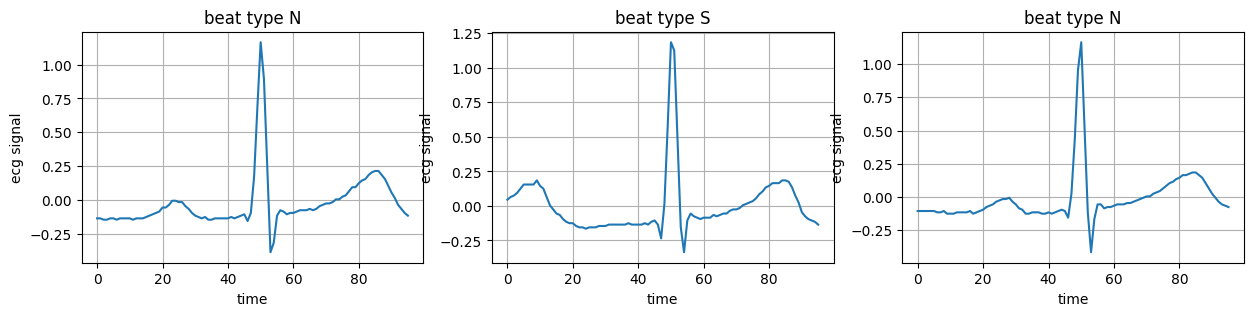

In [10]:
# show example samples
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 3)
plt.subplots_adjust(wspace=0.2)
print(all_annotations[:1000])
sample_number = [0,42,549]
for i, sn in enumerate(sample_number):
    ax[i].plot(all_beats[sn])
    ax[i].set(xlabel='time', ylabel='ecg signal', title='beat type ' + all_annotations[sn])
    ax[i].grid()
plt.show()

In [35]:
# prepare datasets and define error metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# to simplify experiments and speedup training 
# we take only some part of the whole dataset
X, y = all_beats[::10], all_annotations[::10]

# train/validation/test set splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15/0.85, random_state=0)
print(len(y_train), len(y_val), len(y_test))

# perform data normalization: z = (x - u)/s
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
# same for the validation subset
X_val = preprocessing.StandardScaler().fit_transform(X_val)
# and for the test subset
X_test = preprocessing.StandardScaler().fit_transform(X_test)

# define accuracy
def calculate_accuracy(y_pred, y_gt, comment='', printout=True):
    acc_t = np.count_nonzero(y_pred == y_gt)/len(y_gt)
    acc_a = np.count_nonzero(
        np.logical_and(y_pred == y_gt, y_gt != 'N'))/np.count_nonzero(y_gt != 'N')
    if printout is True:
        print('-----------------------------------')    
        print(comment)
        print('Total accuracy, Acc_T = {:.4f}'.format(acc_t))
        print('Arrhythmia accuracy, Acc_A = {:.4f}'.format(acc_a))
        print('-----------------------------------')
    else: return acc_t, acc_a 

12859 2756 2756


Machine learning algorithms to check on the accuracies

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid to search over
param_grid = {'C': [0.1, 1, 10,100], 'gamma': [0.01, 0.1, 1,10]}

# Create the SVM classifier with balanced class weights
svc = SVC(class_weight='balanced')

# Use GridSearchCV to find the best hyperparameters
clf = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1)
clf.fit(X_train, y_train)

# Predict the test labels using the best classifier
y_pred = clf.predict(X_test)

# Calculate and print the accuracy score
accuracy = calculate_accuracy(y_pred, y_test, comment='balanced SVM classifier')
print('Accuracy:', accuracy)

-----------------------------------
balanced SVM classifier
Total accuracy, Acc_T = 0.9057
Arrhythmia accuracy, Acc_A = 0.6970
-----------------------------------
Accuracy: None


In [21]:
from sklearn.ensemble import RandomForestClassifier

# Train the classifier
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
y_pred = rf.fit(X_train, y_train).predict(X_test)

# Calculate the accuracy
calculate_accuracy(y_pred, y_test, comment='Random Forest classifier')

-----------------------------------
Random Forest classifier
Total accuracy, Acc_T = 0.9405
Arrhythmia accuracy, Acc_A = 0.5212
-----------------------------------


In [36]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# Define the pipeline
svm_pipeline = Pipeline([
    ('pca', PCA()),
    ('svm', SVC(kernel='rbf', class_weight='balanced'))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'pca__n_components': [10, 20, 50],
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': ['scale', 'auto']
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Predict using the best SVM classifier
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

# Calculate accuracy
calculate_accuracy(y_pred, y_test, comment='Best SVM classifier')

-----------------------------------
Best SVM classifier
Total accuracy, Acc_T = 0.9470
Arrhythmia accuracy, Acc_A = 0.8019
-----------------------------------


In [40]:
# define accuracy
def calculate_accuracy(y_pred, y_gt, comment=''):
    acc_t = np.count_nonzero(y_pred == y_gt)/len(y_gt)
    acc_a = np.count_nonzero(
        np.logical_and(y_pred == y_gt, y_gt != 'N'))/np.count_nonzero(y_gt != 'N')
    print('-----------------------------------')    
    print(comment)
    print('Total accuracy, Acc_T = {:.4f}'.format(acc_t))
    print('Arrhythmia accuracy, Acc_A = {:.4f}'.format(acc_a))
    print('-----------------------------------')
    return acc_t, acc_a

# train the MLP classifier
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(128,64,32), max_iter=500, activation = 'relu', solver='adam', random_state=1)
mlp.fit(X_train, y_train)

# predict on validation set
y_val_pred = mlp.predict(X_val)

# calculate accuracy on validation set
Acc_T, Acc_A = calculate_accuracy(y_val_pred, y_val, comment='Validation Set')

-----------------------------------
Validation Set
Total accuracy, Acc_T = 0.9575
Arrhythmia accuracy, Acc_A = 0.7157
-----------------------------------


In [42]:
import pywt
from sklearn.tree import DecisionTreeClassifier

# extract features using different wavelets and simple differences
def extract_features(input_sample):
    out = np.array([])
# sym8
    cA = pywt.downcoef('a', input_sample, 'sym8', level=4, mode='per')
    out = np.append(out,cA)
    cD = pywt.downcoef('d', input_sample, 'sym8', level=4, mode='per')
    out = np.append(out,cD)
# db6/9
    cA = pywt.downcoef('a', input_sample, 'db6', level=4, mode='per')
    out = np.append(out,cA)
    cD = pywt.downcoef('d', input_sample, 'db6', level=4, mode='per')
    out = np.append(out,cD)
    cA = pywt.downcoef('a', input_sample, 'db9', level=4, mode='per')
    out = np.append(out,cA)
    cD = pywt.downcoef('d', input_sample, 'db9', level=4, mode='per')
    out = np.append(out,cD)
# dmey
    cA = pywt.downcoef('a', input_sample, 'dmey', level=4, mode='per')
    out = np.append(out,cA)
    cD = pywt.downcoef('d', input_sample, 'dmey', level=4, mode='per')
    out = np.append(out,cD)

# differences
    differences = np.zeros(16)
    for i, t in enumerate(range(40, 56)):
        differences[i] = input_sample[t+1]-input_sample[t]
    out = np.append(out,differences)
    return out

# collect vector of features for all samples
def data_features(input_data):
    return np.array([extract_features(sample) for sample in input_data])

X_train_ = data_features(X_train)
print(X_train_.shape)
X_test_ = data_features(X_test)
print(X_test_.shape)

dtc = DecisionTreeClassifier(criterion='entropy', 
                             class_weight='balanced', 
                             min_samples_leaf=10,
                             max_depth=15)
y_pred = dtc.fit(X_train_, y_train).predict(X_test_)
calculate_accuracy(y_pred, y_test, comment='DT with wavelets')

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion='entropy', 
                             n_estimators=500, 
                             max_depth=10, 
                             class_weight='balanced')
y_pred = rfc.fit(X_train_, y_train).predict(X_test_)
calculate_accuracy(y_pred, y_test, comment='RF with wavelets')

from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=200)
y_pred = abc.fit(X_train_, y_train).predict(X_test_)
calculate_accuracy(y_pred, y_test, comment='Ada with wavelets')

(12859, 64)
(2756, 64)
-----------------------------------
DT with wavelets
Total accuracy, Acc_T = 0.8447
Arrhythmia accuracy, Acc_A = 0.7170
-----------------------------------
-----------------------------------
RF with wavelets
Total accuracy, Acc_T = 0.9521
Arrhythmia accuracy, Acc_A = 0.6792
-----------------------------------
-----------------------------------
Ada with wavelets
Total accuracy, Acc_T = 0.9097
Arrhythmia accuracy, Acc_A = 0.4874
-----------------------------------


(0.9096516690856313, 0.48742138364779874)

## Resampling

In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier

# Resample the training data using SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_, y_train)

# Train the AdaBoost classifier on the resampled data
abc = AdaBoostClassifier(n_estimators=200)
y_pred = abc.fit(X_train_res, y_train_res).predict(X_test_)

# Calculate accuracy on test set
calculate_accuracy(y_pred, y_test, comment='AdaBoost with SMOTE')

-----------------------------------
AdaBoost with SMOTE
Total accuracy, Acc_T = 0.7032
Arrhythmia accuracy, Acc_A = 0.7421
-----------------------------------


(0.7031930333817126, 0.7421383647798742)

## Base estimators 

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
# Define the base classifiers
base_estimators = [
    DecisionTreeClassifier(criterion='entropy', class_weight='balanced', min_samples_leaf=10, max_depth=15),
    LogisticRegression(solver='lbfgs', multi_class='auto', class_weight='balanced')
]

# Train and test with AdaBoost using different base estimators
for base_estimator in base_estimators:
    abc = AdaBoostClassifier(n_estimators=200, base_estimator=base_estimator)
    y_pred = abc.fit(X_train_, y_train).predict(X_test_)
    calculate_accuracy(y_pred, y_test, comment=f'Ada with {base_estimator.__class__.__name__} base estimator')

-----------------------------------
Ada with DecisionTreeClassifier base estimator
Total accuracy, Acc_T = 0.9452
Arrhythmia accuracy, Acc_A = 0.5283
-----------------------------------
-----------------------------------
Ada with LogisticRegression base estimator
Total accuracy, Acc_T = 0.5098
Arrhythmia accuracy, Acc_A = 0.5597
-----------------------------------


## Deep decision tree base estimator

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
# Define the base classifiers
base_estimators = [
    DecisionTreeClassifier(criterion='entropy', class_weight='balanced', min_samples_leaf=10, max_depth=100), #using max_depth of 100
]

# Train and test with AdaBoost using deep decision tree base estimators
for base_estimator in base_estimators:
    abc = AdaBoostClassifier(n_estimators=200, base_estimator=base_estimator)
    y_pred = abc.fit(X_train_, y_train).predict(X_test_)
    calculate_accuracy(y_pred, y_test, comment=f'Ada with {base_estimator.__class__.__name__} base estimator')

-----------------------------------
Ada with DecisionTreeClassifier base estimator
Total accuracy, Acc_T = 0.9452
Arrhythmia accuracy, Acc_A = 0.5252
-----------------------------------
